<span style='line-height:1.5;font-size: 17px'>
<hr style=" border: 1.5px solid black;">
<h1><center> Estimation et Evaluation des Mesures de Risque de Marché </center></h1>
<h2><center> "Analyse Comparative de la VaR Historique et du Modèle CAViaR sur l'Évaluation du Risque Financier de Microsoft" </center></h2>


<div style="text-align: right;">
   <h3><center> M2 MBFA-GDA / 2023-2024 </center></h3>
    <h7>Sous la supervisions de THOMAS CHUFFART</h7>
<hr style=" border: 1.5px solid black;">
</div>
</span>
    <h3>**PLAN DE TRAVAIL**</h3>
</span>

# 	Introduction
Le projet qui consistent à collecter et analyser les données financières de Microsoft à partir de Yahoo Finance.

## I.	Collecte et Observation des Données
#### 1.	Collecte des Données
- Importation des bibliothèques nécessaires comme pandas, numpy, matplotlib, et autres.
- Définition de la période d'étude (1998-2022) et des actifs à étudier (MSFT).
- Téléchargement et affichage des premières et dernières rangées des données pour inspection.

#### 2.	Observation des Données
- **Conception et affichage de la Dataframe qui vas stocker les modalités** :
- **Nettoyage et formatage** : ce travail consiste a traiter les données pour eliminer les valeurs manquantes.
- **Affichage du Prix Historique allant de 1998 a 2022 



## II.	Preparation et Analyse des Données
#### 1.	Preparation des Données
* Nettoyage et formatage des données pour éliminer les valeurs manquantes.
* Génération des statistiques descriptives des prix de cloture de l'actif Microsoft.

#### 2. Analyse Exploratoire
* Visualisation des données grace au graphique d'évolution des prix de clôture,
* Calcul des rendementsa partir des prix de cloture de l'actif et sous forme logarithmique.
* Visualisation de l'histogramme, ainsi que la Fonctions de Densité basé sur les Rendements.

#### 3.	Analyse Statistique
* Observation de la distribution des rendements (moyenne, écart-type, skewness, kurtosis).
* Création et interprétation de graphiques tels que QQ-plots pour évaluer la normalité des distributions.

## III.	Modélisation du Risque
#### 1.  Presentation des differentes Methodes de Calcul de la VaR:
- Méthode Non parametrique 
- Méthode Semi-parametrique
- Méthode parametrique 
    
#### III-2.	Estimation de la Valeur à Risque (VaR) avec la Méthode Historique
* Etude de la stationarité et définition des niveaux de confiance de la VaR
* Implementation de la méthode historique de la VaR sur 1 et 10 jours 
* Backtesting.

#### III-3.	Implémentation de Modèles VAR Avancés (VaR Semi-Paramétrique)
* Implementation des méthodes historique et Semi-Parametrique pour l'estimation de la VaR.
* Discussion sur l'implémentation du modèle CAViaR pour une modélisation plus précise des rendements conditionnels.
* Estimation des paramètres via maximisation de la vraisemblance ou méthodes des moments généralisés.
* Backtesting


# Conclusions des Travaux et Recommandations
* Comparaison entre l'approche Semi-Parametrique et l'approche Non Parametrique
* Comparaison des méthodes de mesure du risque et de leurs résultats.
* Discussion des implications des résultats pour la gestion du risque.
* Propositions pour des travaux futurs basés sur les résultats obtenus.



# Introduction
<span style='line-height:1.5;font-size: 17px'>
<hr style=" border: 1.5px solid black;">
</span>

**Le projet qui consistent à collecter et analyser les données financières de Microsoft à partir de Yahoo Finance sur une priode allant de de 1998 à 2022.
L'objectif est d'appliquer des modèles financiers quantitatifs de mesure de risk, afin d'évaluer le risque et faire une comparaison des Approches non parametrique et semi-parametrique de la mesure de risque, en utilisant des techniques avancées d'analyse de données ainsi que les models de mesure de risque.** 

# I. Collecte et Observation des Données
<span style='line-height:1.5;font-size: 17px'>
<hr style=" border: 1.5px solid black;">
</span>

### 1. Collecte des données
- Importation des bibliothèques nécessaires comme pandas, numpy, matplotlib, et autres.
- Définition de la période d'étude (1998-2022) et des actifs à étudier (MSFT).
- Téléchargement et affichage des premières et dernières rangées des données pour inspection.


In [28]:
## Importation des librairies
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sb
import scipy.stats as stats
import statsmodels.api as sm
import datetime as datetime
import matplotlib.pyplot as plt
# %matplotlib inline 
from pandas.plotting import scatter_matrix;
from statsmodels.tsa.stattools import adfuller

In [2]:
#******* Premiere Importationde des données sur 24 ans (1998-2022)*******#

assets = ['MSFT']
start = '1998-01-01'  # Remplacez par la date de début souhaitée
end = dt.datetime.today().strftime('2022-12-29')


In [3]:
# Boucle pour lire les differentes modalités de chacunes de nos variables ou actifs financier et stocker dans l'objet price
for price in assets:
    price = yf.download(price,start,end)

price

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1998-01-02,16.203125,16.437500,16.187500,16.390625,10.142838,39748000
1998-01-05,16.406250,16.703125,15.984375,16.296875,10.084824,80377600
1998-01-06,16.218750,16.625000,16.156250,16.390625,10.142838,67834400
1998-01-07,16.234375,16.398438,15.937500,16.195312,10.021975,61492800
1998-01-08,16.078125,16.515625,15.937500,16.312500,10.094492,77619200
...,...,...,...,...,...,...
2022-12-21,241.690002,245.619995,240.110001,244.429993,241.834488,23690600
2022-12-22,241.259995,241.990005,233.869995,238.190002,235.660767,28651700
2022-12-23,236.110001,238.869995,233.940002,238.729996,236.195023,21207000


## I-2. Observation des Données

- Conception et affichage de la Dataframe qui vas stocker les modalités :
- Nettoyage et formatage : ce travail consiste a traiter les données pour eliminer les valeurs manquantes.
- Affichage du Prix Historique allant de 1998 a 2022 



In [4]:
# Propriétés et Carracteriqtiques de Price (le type DataFrame, Période, le Nombres de colonnes et leurs propriétés)
price2 = price.copy()
price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6289 entries, 1998-01-02 to 2022-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6289 non-null   float64
 1   High       6289 non-null   float64
 2   Low        6289 non-null   float64
 3   Close      6289 non-null   float64
 4   Adj Close  6289 non-null   float64
 5   Volume     6289 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 343.9 KB


In [5]:
# Creation et affichage de la Dataframe qui vas stocker les modalités (prix) des differentes variables (actifs)
p_close = pd.DataFrame()

# Nous pouvons aussi utiliser les dictionnaires
  # p_all = {}
  # p_all[price]

# Boucle qui permet de stoker la modalité prix de tout les differentes variables dans notre dataFrame
for price in assets:
    p_close[price] = yf.download(price,start,end)["Close"]
p_close.name = 'MSFT_Close'


# Affichage de la DataFrame (Head, Tail) Uniquement avec les Prix de clotures des actifs (variables)

p_close


[*********************100%%**********************]  1 of 1 completed


,MSFT
Date,
1998-01-02,16.390625
1998-01-05,16.296875
1998-01-06,16.390625
1998-01-07,16.195312
1998-01-08,16.312500
...,...
2022-12-21,244.429993
2022-12-22,238.190002
2022-12-23,238.729996


# II. Preparation et Analyse des Données
<span style='line-height:1.5;font-size: 17px'>
<hr style=" border: 1.5px solid black;">
</span>

### 1. Preparation des Données
* Nettoyage et formatage des données pour éliminer les valeurs manquantes.
* Génération des statistiques descriptives des prix de cloture de l'actif Microsoft.

In [6]:
#estimation des Valeurs Manquantes
p_close.isnull().sum()

MSFT    0
dtype: int64

In [7]:
#Statistique descriptive 
p_close.describe()

,MSFT
count,6289.000000
mean,66.031250
std,72.945498
min,15.150000
25%,26.860001
50%,31.790001
75%,58.029999
max,343.109985


### II-2. Analyse Exploratoire
* Visualisation des données grace au graphique d'évolution des prix de clôture,
* Calcul des rendementsa partir des prix de cloture de l'actif et sous forme logarithmique.
* Visualisation de l'histogramme, ainsi que la Fonctions de Densité basé sur les Rendements.

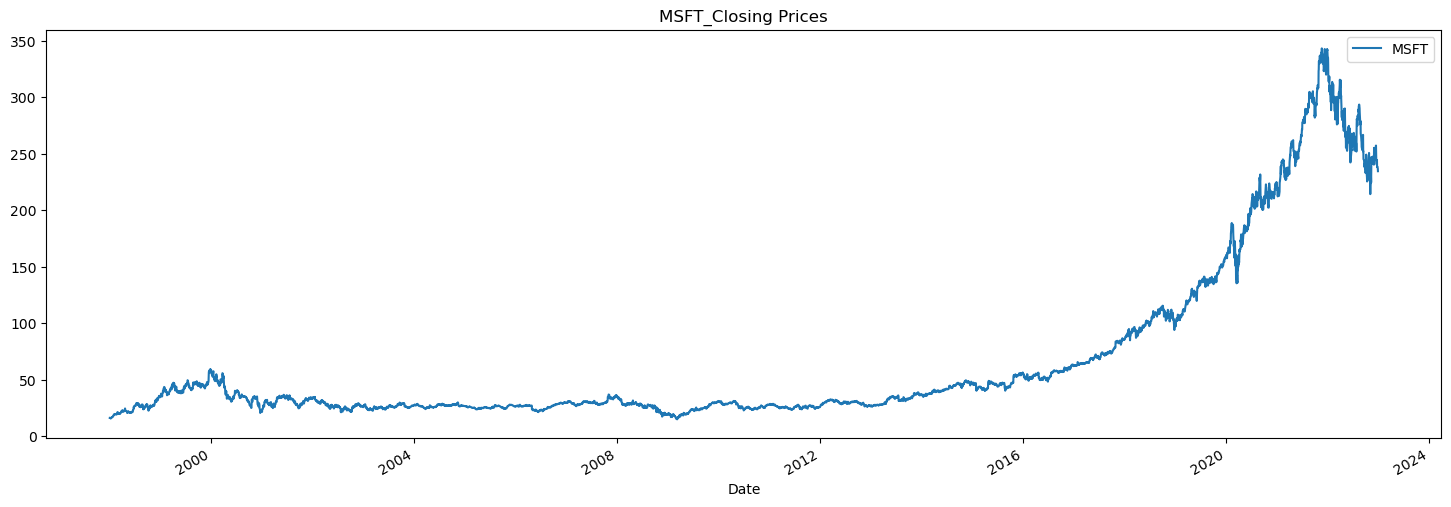

In [8]:
#Plot du Graphique et Observation de l'evolution
# premier Plot de la Tendance sur une periode allant de 2007 a  hier (16 ans)

p_close[price].plot(label= 'MSFT', figsize=(18,6), title = 'MSFT_Closing Prices');
plt.legend();

**Interpretation:**
    
    - Nous observons  des mouvement sur la periode fin 90-2000 et 2007-2009. Cela correspond respectivement à l'ère post-bulle Internet ainsi que la crise immobiliere de 2008.
    - les periodes 2002-2006 et 20010-2016 sont marqués par une une evolution relativement constante 
    - de de 2017 a 2021 et 2023 sont marquées par une volatilité accrue avec des hausses et des chutes importantes.
    Cela peut se justifier par des facteurs de croissance generalisé, la Covid, l'inflation ou autre facteurs mondiaux.

In [9]:
#Calcul des Rendements journaliers

# Etapes de Calcul:
# cree une coleonne pour le rendement de chaque actif
# utiliser la formule et appliqué la methode shift
# on peut aussi utiliser la fonction "pct.change" de pandas

Return_MSFT = (p_close[price]/p_close[price].shift(1))-1
Return_MSFT = Return_MSFT.dropna()
Return_MSFT.head(5)

Date
1998-01-05   -0.005720
1998-01-06    0.005753
1998-01-07   -0.011916
1998-01-08    0.007236
1998-01-09   -0.026820
Name: MSFT, dtype: float64

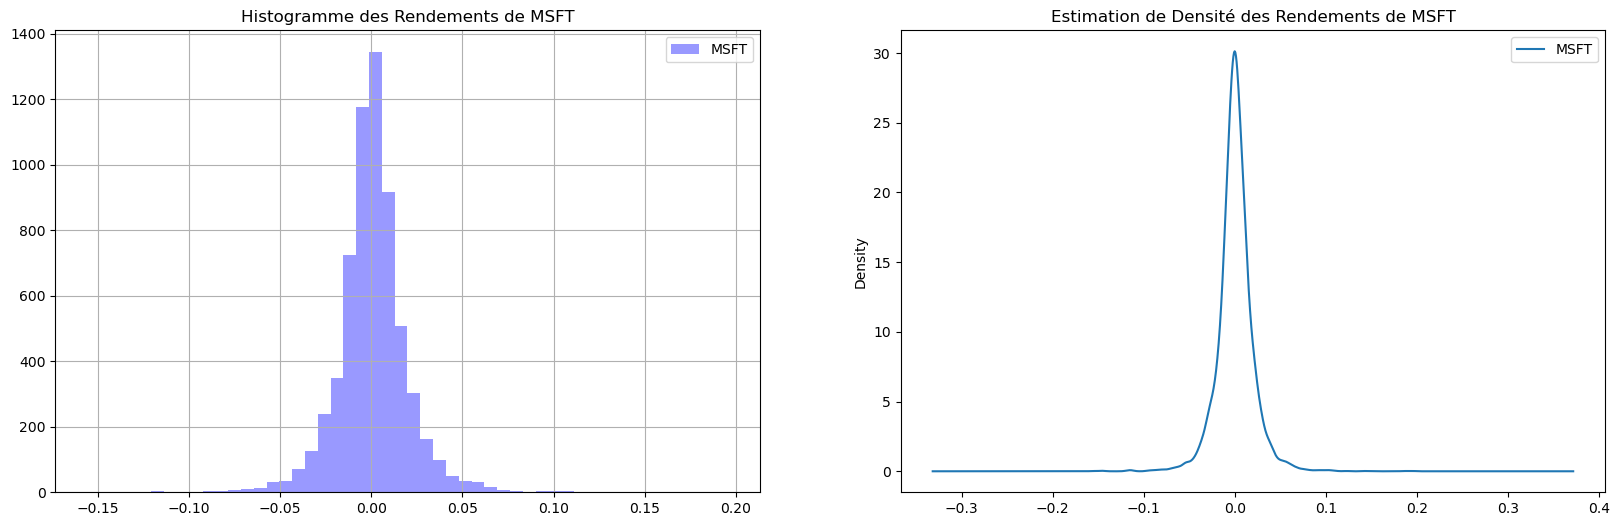

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6)) # 1 row, 2 columns for subplots

# Histogramme pour MSFT
Return_MSFT.hist(bins=50, ax=ax[0], label='MSFT', alpha=0.4, color='blue')
ax[0].set_title('Histogramme des Rendements de MSFT')
ax[0].legend()

# Estimation des densités pour MSFT
Return_MSFT.plot(kind='kde', ax=ax[1], label='MSFT')
ax[1].set_title('Estimation de Densité des Rendements de MSFT')
ax[1].legend()

plt.show()

### INTERPRETATION 

- Histogramme des Rendements de MSFT:


    - l'Histogramme nous montre la distribution de la fréquence des rendements et nous voyons qu'ils sont sont regroupés en intervalles, et la hauteur des barres représente le nombre d'occurrences dans chaque intervalle.
    - Cette distribution semble centrée autour de zéro, avec la majorité des rendements concentrés autour de la moyenne.
    - Nous observons des jours avec des rendements légèrement positifs et négatifs, mais peu de jours avec des rendements extrêmes (très hauts ou très bas), ce qui suggère que l'actif ne subit pas de variations extrêmes sur la période observée.

- Estimation de Densité des Rendements de MSFT:


    - La fonction de Densité nous montre la probabilité des rendements de l'actif. et plus precisement la visualaisation de la distribution continue des données.
    - La pointe aiguë suggère une forte concentration de rendements autour de la médiane, d'ou le pic dans la distribution    des rendements.
    - Nous observons une  distribution faiblement asymétrique, avec une queue plus épaisse à Droite. cequi indique une           présence de rendements extrêmement Positifs plus fréquents que les rendements Negatifs de même amplitude.

### II-3.	Analyse Statistique
* Observation de la distribution des rendements (moyenne, écart-type, skewness, kurtosis).
* Création et interprétation de graphiques tels que QQ-plots pour évaluer la normalité des distributions.

In [11]:
skewness = Return_MSFT.skew()
kurtosis = Return_MSFT.kurtosis()

print(f"Skewness des rendements de MSFT: {skewness}")
print(f"Kurtosis des rendements de MSFT: {kurtosis}")

Skewness des rendements de MSFT: 0.17639064935677523
Kurtosis des rendements de MSFT: 8.222579478486312


    - Le skewness mesure l'asymétrie de la distribution par rapport à une distribution normale. et le La kurtosis est une mesure de la tendance des données à produire des valeurs extrêmes (à la fois négatives et positives) par rapport à la distribution normale.

    - Skewness: Avec une skewness légèrement positive de 0.176, les rendements de MSFT montrent une petite inclinaison vers des gains plus élevés.

    - Kurtosis: Un kurtosis élevé à 8.222 suggère une forte présence de valeurs extrêmes et une probabilité plus grande de rendements par rapport à une distribution normale.

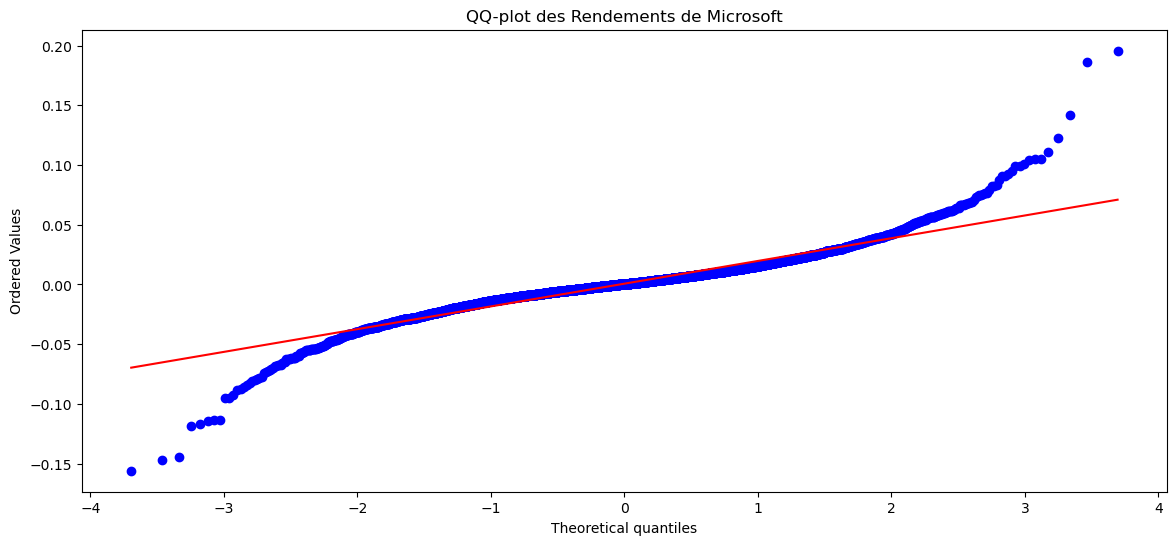

In [12]:


plt.figure(figsize=(14, 6))
stats.probplot(Return_MSFT, dist="norm", plot=plt)  # Assurez-vous que Return_MSFT est une série de rendements
plt.title('QQ-plot des Rendements de Microsoft')
plt.show()


#### Le QQ-plot (Quantile-Quantile plot) des Rendements de Microsoft:

    - il compare les rendements de Microsoft à une distribution normale afin de voir s'ils sont sont normalement distribués. 
    - Nous pouvons dire que les points près de la ligne rouge au centre indiquent une distribution normale, mais par contre, les extrémités loin de la ligne montrent des rendements extrêmes, signalant un risque plus élevé que prévu selon la               distribution normale.

## III.	Modélisation du Risque
<span style='line-height:1.5;font-size: 17px'>
<hr style=" border: 1.5px solid black;">
</span>

#### 1.  Presentation des differentes Methodes de Calcul de la VaR:
    - Méthode Non parametrique 
    - Méthode Semi-parametrique
    - Méthode parametrique 
* Nous allons calculer la VaR a partir de l'une des Methodes ci-dessous:
- Méthode Non parametrique tel que (Historical Simulation, Weighted Historical Simulation, Filtered Historical Simulation...): Cette aproche s'appuie uniquement sur les donnéesne et ne fait pas d'hypothèses sur la distribution des Rendements. 
- Méthode Semi-parametrique tel que ( La Théorie des extrêmes, le Model CAViaR): Elle est Partiellement fondé sur des hypothèses structurelles et combine des éléments des approches paramétriques et non paramétriques.
- Méthode parametrique tel que (ARCH, GARCH univarié, GARCH multivarié, RiskMetrics). Dans cette approche, On supposition que les rendements suivent une distribution normale

### III-2.	Estimation de la Valeur à Risque (VaR) avec la Méthode Historique
* Etude de la stationarité et définition des niveaux de confiance de la VaR
* Implementation de la méthode historique de la VaR sur 1 et 10 jours 
* Backtesting.

In [13]:
C_price = price2['Adj Close']
C_price

Date
1998-01-02     10.142838
1998-01-05     10.084824
1998-01-06     10.142838
1998-01-07     10.021975
1998-01-08     10.094492
                 ...    
2022-12-21    241.834488
2022-12-22    235.660767
2022-12-23    236.195023
2022-12-27    234.443817
2022-12-28    232.039642
Name: Adj Close, Length: 6289, dtype: float64

In [14]:
# Application de la Methode Historique
# Nous allons utiliser la fonction np.percentile pour calculer le VaR. 
# Pour un niveau de confiance de 95 %, vous cherchez le 5e percentile (car VaR mesure les pertes, pas les gains)


# Définition du niveau de confiance
conf= -0.05

# Vérification de la stationnarité avec le test ADF
adf_test = adfuller(C_price)
print("ADF Statistic: %f" % adf_test[0])
print("P-Value: %f" % adf_test[1])
if adf_test[1] < 0.05:
    print("Cette série est stationnaire.")
else:
    print("Cette série n'est pas stationnaire.")


ADF Statistic: 1.351343
P-Value: 0.996881
Cette série n'est pas stationnaire.


In [15]:
C_price = price2['Adj Close']

In [16]:
## Nous allons stationarisé notre serie 

# Calcul du Rendement
price2['Tx_Var'] = (price2['Adj Close']/price2['Adj Close'].shift(1))

# Multiplier par 100 pour obtenir un pourcentage
#price2['Tx_Var']  = price2['Tx_Var']*100

# Supprimer les valeurs NA générées par la méthode shift
price2.dropna(subset=['Tx_Var'], inplace=True)
price2['Tx_Var'] = 1-price2['Tx_Var']
# Afficher les 5 premières lignes pour vérifier
price2['Tx_Var'].head(5)

Date
1998-01-05    0.005720
1998-01-06   -0.005753
1998-01-07    0.011916
1998-01-08   -0.007236
1998-01-09    0.026820
Name: Tx_Var, dtype: float64

In [17]:
# Application de la Methode Historique
# Nous allons utiliser la fonction np.percentile pour calculer le VaR. 
# Pour un niveau de confiance de 95 %, vous cherchez le 5e percentile (car VaR mesure les pertes, pas les gains)


# Définition du niveau de confiance
conf= -0.05

# Vérification de la stationnarité avec le test ADF
adf_test = adfuller(price2['Tx_Var'])
print("ADF Statistic: %f" % adf_test[0])
print("P-Value: %f" % adf_test[1])
if adf_test[1] < 0.05:
    print("*** Cette série est stationnaire.")
else:
    print("Cette série n'est pas stationnaire.")



ADF Statistic: -26.994128
P-Value: 0.000000
*** Cette série est stationnaire.


In [18]:
# Calcul du VaR à 95%
conf= -0.05
x = 1-conf

VaR_95 = np.percentile(price2['Tx_Var'], x)

# Résultat
print(f"VaR sur 1 jours à 95% de confiance: {VaR_95}")

VaR sur 1 jours à 95% de confiance: -0.05631083906343302


In [19]:
VaR_10_jours_a_95 = VaR_95 * np.sqrt(10)
print(f"VaR sur 10 jours à 95% de confiance: {VaR_10_jours_a_95}")

VaR sur 10 jours à 95% de confiance: -0.17807050839563116


#### Interpretation: 
    - Les valeurs obtenues nous montrent que La VaR à 95% sur 1jour est de -5.63%, indiquant qu'il y a 95% de chance que la perte de valeur journalière de l'actif Microsoft ne dépasse pas -5.63%.
    - La VaR sur 10 jours à 95% est de -17.81%, montrant que sur une période plus longue, le risque de perte augmente. 

### * Backtesting VAR Historique
- Le backtesting est un ensemble de procédures statistiques dont le but est de vérifier que les pertes réelles observées ex-post sont en adéquation avec pertes prévues.
Cela implique de comparer systématiquement l’historique des prévisions de Value-at-Risk aux rendements observés du portefeuille (Jorion, 2007, page 139).

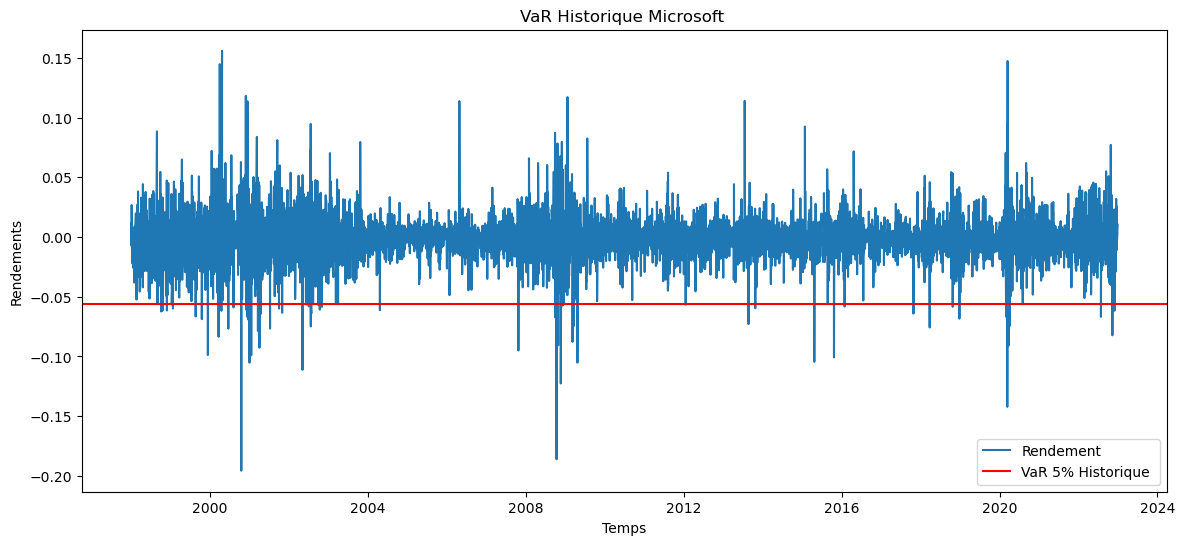

In [20]:
# Création du graphique
plt.figure(figsize=(14, 6))

# Tracé des rendements
plt.plot(price2['Tx_Var'], label='Rendement')

# Ligne horizontale pour la VaR historique
plt.axhline(y=VaR_95, color='red', linestyle='-', label='VaR 5% Historique ')

plt.title('VaR Historique Microsoft ')
plt.xlabel('Temps')
plt.ylabel('Rendements')
plt.legend()
plt.show()

### Interpretation: 

- Nous remarquons une forte volatilité des Actions de Microsoft. cela se traduit par des variations importantes sur le graphique avec une attention particulière sur les pics lors des crises économiques majeures.
- La Value-at-Risk (VaR)est representé par La ligne rouge qui représente la VaR à 95%, indiquant que les pertes ne sont pas prévues de dépasser ce seuil plus de 5% du temps, illustrant le risque maximal accepté.

**Hit et Violation de la VaR associé aux faits Économiques.**
- les cas de Violation du Niveau de VaR associé aux faits economiques peut etre interpreté comme suite:
    - La Forte volatilité des années 2000 correspondant à l'éclatement de la bulle internet.
    - Crise des Subprimes (2008) est marqué par une augmentation significative de la volatilité a un niveau similaire a celui de lq bulle Internet.
    - le 3e Pics de volatilité important en 2020 réflete l'impact de la pandémie sur les marchés financiers (COVID-19)

Le graphique démontre que les périodes de crise entraînent des HITS ou Violation de la VaR qui se traduit par une augmentation des Niveau de Volatilités et du risque d'investissement, ajouter a cela, nous voyons que la var a 95% n'est pas un niveau optimal car les rendements traversent plusieurs fois la ligne de var. cela est observable par des rendements descendant en dessous de la ligne de VaR.



### III-3.	Implémentation de Modèles VAR Avancés (VaR Semi-Paramétrique)
* Implementation des méthodes historique et Semi-Parametrique pour l'estimation de la VaR.
* Discussion sur l'implémentation du modèle CAViaR pour une modélisation plus précise des rendements conditionnels.
* Estimation des paramètres via maximisation de la vraisemblance ou méthodes des moments généralisés.
* Backtesting

## 4. Implémentation du modèle CAViaR
- **Modélisation des rendements** : Nous allons Utilisez un modèle autorégressif conditionnel.
- **Estimation** : Nous allons Estimez les paramètres du modèle CAViaR par maximisation de la vraisemblance ou méthodes de moments généralisés.

In [21]:
# Calculer les rendements quotidiens
df = pd.DataFrame(p_close).pct_change().dropna()
#df = pd.DataFrame(price2['Tx_Var']).dropna()
df.columns = ['Returns']

In [22]:
# Modélisation OLS des Rendements
# Ajoute une constante pour l'intercept

X = sm.add_constant(np.arange(len(df['Returns'])))
y = df['Returns']

# Fit le modèle OLS
model = sm.OLS(y, X).fit()

In [23]:
df['Returns'].dropna()

Date
1998-01-05   -0.005720
1998-01-06    0.005753
1998-01-07   -0.011916
1998-01-08    0.007236
1998-01-09   -0.026820
                ...   
2022-12-21    0.010877
2022-12-22   -0.025529
2022-12-23    0.002267
2022-12-27   -0.007414
2022-12-28   -0.010255
Name: Returns, Length: 6288, dtype: float64

In [24]:
residuals = model.resid

# Calcul des quantiles à différents niveaux de confiance
quantiles = np.percentile(residuals, [5, 1, 0.1])

In [25]:
# Ajustement pour le VaR sur 10 jours
VaR_1_jours_95 = quantiles[0]
VaR_1_jours_99 = quantiles[1]
VaR_1_jours_999 = quantiles[2]

print(f"VaR sur 1 jours à 95% de confiance: {VaR_1_jours_95}")
print(f"VaR sur 1 jours à 99% de confiance: {VaR_1_jours_99}")
print(f"VaR sur 1 jours à 99.9% de confiance: {VaR_1_jours_999}")

VaR sur 1 jours à 95% de confiance: -0.029826903626362092
VaR sur 1 jours à 99% de confiance: -0.05448770100125887
VaR sur 1 jours à 99.9% de confiance: -0.11428545390865062


In [26]:
# Ajustement pour le VaR sur 10 jours
VaR_10_days_95 = quantiles[0] * np.sqrt(10)
VaR_10_days_99 = quantiles[1] * np.sqrt(10)
VaR_10_days_999 = quantiles[2] * np.sqrt(10)

print(f"VaR sur 10 jours à 95% de confiance: {VaR_10_days_95}")
print(f"VaR sur 10 jours à 99% de confiance: {VaR_10_days_99}")
print(f"VaR sur 10 jours à 99.9% de confiance: {VaR_10_days_999}")

VaR sur 10 jours à 95% de confiance: -0.09432095100964007
VaR sur 10 jours à 99% de confiance: -0.17230523963021516
VaR sur 10 jours à 99.9% de confiance: -0.3614023377775289


# Interpretation: 

* Nous remarquons une augmentation du niveau de VaR avec le Niveau de Confiance de 95% à 99,9%, pour les périodes d'1 et 10 jours.
* Les VaR de 10 jours sont supérieurs aux VaR d'1 jour et cela traduit l'augmentation de la perte potentielle en fonction de la durée.
* Nous remarquons aussi une Croissance Non-linéaire du Risque car la VaR sur 10 jours n'est pas dix fois le VaR d'1 jour, reflétant la volatilité et le risque cumulatif.


## -Backtesting Modele CAViaR

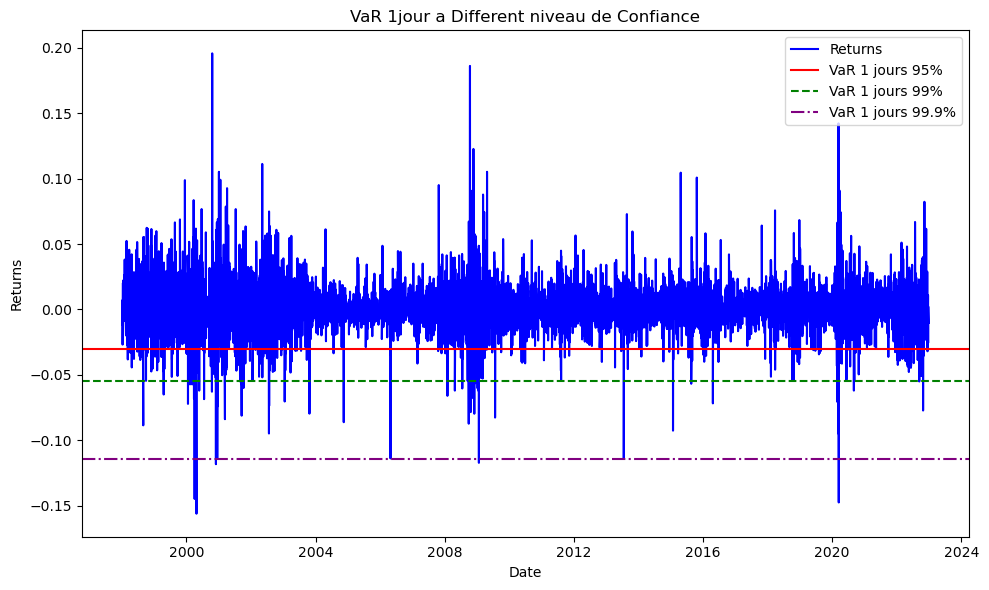

In [27]:
# Création du graphique
plt.figure(figsize=(10, 6))

# Tracé des rendements
plt.plot(df.index, df['Returns'], label='Returns', color='blue')

# Lignes horizontales pour les différents niveaux de VaR
plt.axhline(y=VaR_1_jours_95, color='red', linestyle='-', label='VaR 1 jours 95%')
plt.axhline(y=VaR_1_jours_99, color='green', linestyle='--', label='VaR 1 jours 99%')
plt.axhline(y=VaR_1_jours_999, color='purple', linestyle='-.', label='VaR 1 jours 99.9%')

plt.title('VaR 1jour a Different niveau de Confiance')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.tight_layout()
plt.show()

similaire aux observations de la VaR a 1jours effectuer en amont, Nous voyons que les rendements de l'actif Microsoft varient principalement autour d'un point central, nous observons que La distribution des rendements reste serrée autour de la moyenne et cela indique une certaine régularité d'evolution de l'actif.

   - **Hit et Violation de la VaR associé aux faits Économiques.**
   
Similaire au graphique precedent, Les pics elevé reflètent reflète des periodes de volatilité intense ou les actifs subissent des variations importantes. Nous remarquons que les periodes où la valeurs de l'actif varie au dela des valeurs de la VaR (95%; 99% et 99,9%)sont les année 2000, 2008 et 2020.

    - Gestion du Risque
- La ligne rouge(VaR à 95%) indique le seuil de pertes que l'on ne devrait pas dépasser 95% du temps.
- La ligne en pointillés verts représente la VaR à 99%, qui est dépassée moins fréquemment.
- La ligne en pointillés violets représente la VaR à 99,9%, montrant un niveau de pertes extrêmes qu'on s'attend à ne pas dépasser presque jamais.

La VaR à 5% qui represente le niveau de perte extrême, est dépassé plusieurs fois et conforme aux périodes d'instabilité decrit en amont.

Ce graphique illustre l'utilité mais aussi les limites des modèles de VaR, notamment lors de crises financières aiguës où les pertes peuvent surpasser les prévisions de risque.

# IV. Conclusions des Travaux et Recommandations (Confert rapport definif)
<span style='line-height:1.5;font-size: 17px'>
<hr style=" border: 1.5px solid black;">
</span>

* Comparaison entre l'approche Semi-Parametrique et l'approche Non Parametrique
* Comparaison des méthodes de mesure du risque et de leurs résultats.
* Discussion des implications des résultats pour la gestion du risque.
* Propositions pour des travaux futurs basés sur les résultats obtenus.